# Baseline Remove

hello


/home/jing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


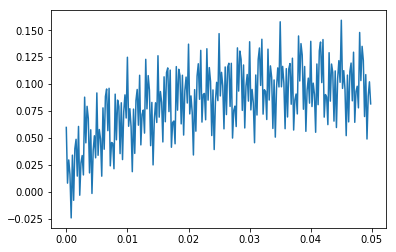

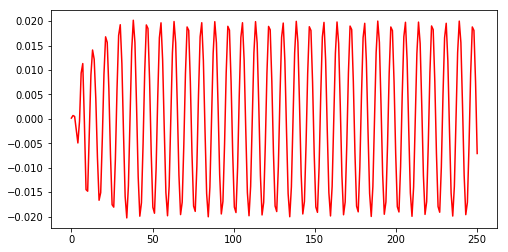

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# base line remove experiments
# bandpass filter method to remove baseline
import sys
sys.path.insert(1, r'./functions')  # add to pythonpath
from filters import butter_bandpass_filter


from myplot import drawLine, drawMarker

def GenSign():
    # 建立有雜訊的訊號並且畫出來
    fs = 5000
    T = 0.05
    nsamples = T * fs
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    return x

def myProcess():
    # 建立有雜訊的訊號並且畫出來
    fs = 5000
    T = 0.05
    nsamples = T * fs
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')
    plt.show()
    
    lowcut = 500.0
    highcut = 1250.0
    
    #lowcut = 4.0
    #highcut = 300.0
    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt2=drawLine(2, y, 'r')
    plt2.show()
    
    
if __name__ == "__main__":
    print('hello')
    myProcess()


ok


/home/jing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


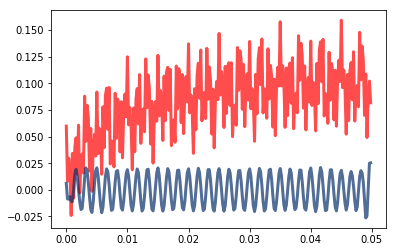

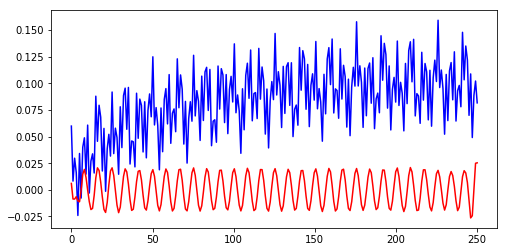

In [37]:
# ThinkDSP Version: remove baseline
import sys
sys.path.insert(1, r'./functions/ThinkDSP/code')  # add to pythonpath
import thinkdsp

fs = 5000
lowcut = 500.0
highcut = 1250.0

my_data = GenSign()
wavObj = thinkdsp.Wave(ys = my_data, framerate = fs)
#wavObj.make_audio()
wavObj.plot(color='red')
segment = wavObj.segment()   # all data
#segment = wavObj.segment(0, 4) # only 4 sec
#segment.plot()

spectrum = segment.make_spectrum()
#spectrum.plot()

    
spectrum.low_pass(highcut) # (500)
spectrum.high_pass(lowcut) # (3)

# spectrum -> wave
filtered = spectrum.make_wave()
filtered.plot()
#print(filtered.ys)
print('ok')

plt2=drawLine(2, my_data, 'b')
plt2=drawLine(2, filtered.ys, 'r')
plt2.show()


/home/jing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


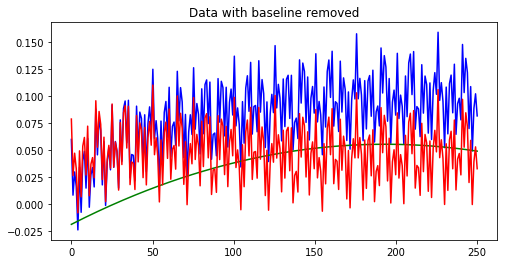

In [45]:
# base line remove experiment 2
import peakutils
import matplotlib.pyplot as plt

fs = 5000
lowcut = 500.0
highcut = 1250.0

my_data = GenSign()

drawLine(1, my_data, 'b')

N = len(my_data)
t = np.linspace(0, N, N)  #產生一條 sampling vector, 範圍從 0 ~ N, 總共 N 個 samples
    
base = peakutils.baseline(my_data, 2)


plt.figure(1, figsize=(10,6))
plt.plot(t, base, 'g')
plt.plot(t, my_data-base, 'r')
plt.title("Data with baseline removed")


plt.show()

# Other Testing

## Low Frequency Signal Testiing

hello


/home/jing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


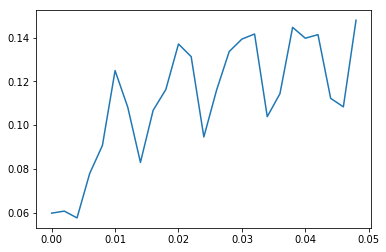

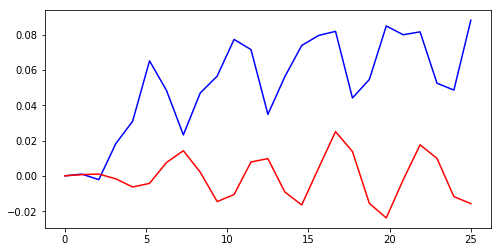

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# base line remove experiments
# bandpass filter method to remove baseline
import sys
sys.path.insert(1, r'./functions')  # add to pythonpath
from filters import butter_bandpass_filter


from myplot import drawLine, drawMarker

def GenSign():
    # 建立有雜訊的訊號並且畫出來
    fs = 500
    T = 0.05
    nsamples = T * fs
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    return (x, t)

def myProcess():
    # 建立有雜訊的訊號並且畫出來
    x, t= GenSign()
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')
    plt.show()
    
    lowcut = 500.0
    highcut = 1250.0
    
    #lowcut = 4.0
    #highcut = 300.0
    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    
    
    # draw comparsion
    drawLine(1, x - abs(x[0]-y[0]), 'b')
    plt2=drawLine(1, y, 'r')
    plt2.show()
    
    
if __name__ == "__main__":
    print('hello')
    myProcess()

# Summary
1. Baseline removing algorithm will shift the signal baseline
2. Baseline reoving algorith will change the morphology of the wave (That will be a concern for ECG diagnose)
3. PeakUtil's algorithm is worse than butter band pass and thinkdsp bandpass filter methods